# Assignment: Linear Models
## Do two questions in total: "Q1+Q2" or "Q1+Q3"
### `! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is 
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

Question 1 is attached to the repository as an image.

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

In [1]:
!pip install pandas numpy seaborn matplotlib

  Using cached numpy-2.3.3-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.6-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 61.5 MB/s eta 0:00:00
Using cached numpy-2.3.3-cp313-cp313-macosx_14_0_arm64.whl (5.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.6-cp313-cp313-macosx_11_0_arm64.

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/Users/calebkim7/linear_models_assignment/data/cars_hw.csv')

print(df.info())
print(df.describe())

# Remove extremely low prices
df = df[df['Price'] > 1000]
df['Price'] = np.log1p(df['Price'])

# arcsinh if skewed
df['Mileage_Run'] = np.arcsinh(df['Mileage_Run'])

# Drop missing numeric values
df.dropna(subset=['Mileage_Run', 'Make_Year', 'Seating_Capacity'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB
None
       Unnamed: 0    Make_Year   Mileage_Run  Seating_Capacity         Price
count  976.000000   976.000000    976.000000        976.000000  9.760000e+02
mean   488.500000  2016.963

2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?

count    976.000000
mean      13.411035
std        0.450275
min       12.144203
25%       13.072649
50%       13.409797
75%       13.691082
max       14.894261
Name: Price, dtype: float64


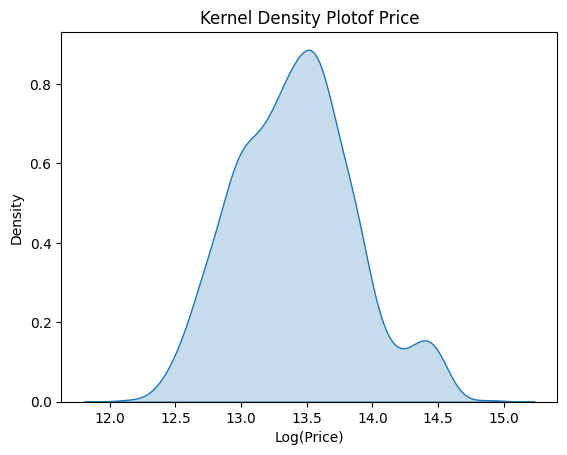

               count       mean       std        min        25%        50%  \
Make                                                                         
Chevrolet        6.0  12.919898  0.480974  12.495008  12.568395  12.752289   
Datsun           3.0  12.576050  0.036311  12.538971  12.558305  12.577640   
Ford            52.0  13.468282  0.210894  12.577640  13.361382  13.469494   
Honda           73.0  13.536319  0.336971  12.663501  13.272508  13.573440   
Hyundai        305.0  13.368512  0.398781  12.421188  13.091906  13.366095   
Jeep             4.0  14.216591  0.105084  14.070154  14.183271  14.240266   
Kia              8.0  14.292178  0.076877  14.129592  14.272242  14.303106   
MG Motors       35.0  14.439052  0.066263  14.278616  14.395745  14.429615   
Mahindra        18.0  13.898954  0.159906  13.587356  13.851809  13.905681   
Maruti Suzuki  293.0  13.218134  0.371408  12.375820  12.926351  13.174958   
Nissan           4.0  13.641195  0.392609  13.071072  13.537776 

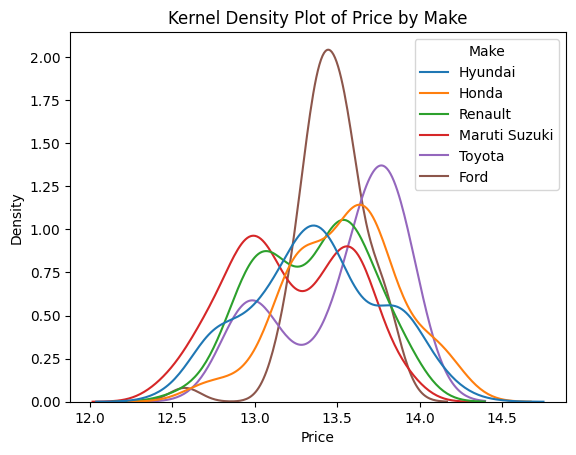

In [4]:
print(df['Price'].describe())

# Kernel Density
sns.kdeplot(df['Price'], fill=True)
plt.title("Kernel Density Plotof Price")
plt.xlabel("Log(Price)")
plt.show()

# Summary by Make
make_summary = df.groupby('Make')['Price'].describe()
print(make_summary)

# Grouped KDE by Make
top_makes = df['Make'].value_counts().head(6).index
sns.kdeplot(data=df[df['Make'].isin(top_makes)], x='Price', hue='Make', common_norm=False)
plt.title("Kernel Density Plot of Price by Make")
plt.show()

2. The most expensive car brands are MG Motors, followed by Kia and then Jeep. In general, the median log price is between 13 and 14.

3. Split the data into an 80% training set and a 20% testing set.

In [6]:
!pip install scikit-learn

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

  Using cached scikit_learn-1.7.2-cp313-cp313-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached scipy-1.16.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-macosx_12_0_arm64.whl (8.6 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached scipy-1.16.2-cp313-cp313-macosx_14_0_arm64.whl (20.9 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df.drop(columns=['Price'])
y = df['Price']

numeric_features = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
categorical_features = ['Color', 'Body_Type', 'Make', 'Fuel_Type', 'Transmission', 'Transmission_Type']

def evaluate(model, X_train, y_train, X_test, y_test, name="Model"):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f"{name} - Train R2: {train_r2:.3f}, Test R2: {test_r2:.3f}, "
          f"Train RMSE: {rmse_train:.3f}, Test RMSE: {rmse_test:.3f}")
    return test_r2, rmse_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Numeric only
X_train_num = X_train[numeric_features]
X_test_num = X_test[numeric_features]
linreg_num = LinearRegression().fit(X_train_num, y_train)
evaluate(linreg_num, X_train_num, y_train, X_test_num, y_test, "Numeric Only")

# Model 2: Categorical only
preprocessor_cat = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_features)],
    remainder='drop'
)
linreg_cat = Pipeline(steps=[('preprocessor', preprocessor_cat),
                             ('regressor', LinearRegression())])
linreg_cat.fit(X_train, y_train)
evaluate(linreg_cat, X_train, y_train, X_test, y_test, "Categorical Only")

# Model 3: Combined
preprocessor_full = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)
linreg_full = Pipeline(steps=[('preprocessor', preprocessor_full),
                              ('regressor', LinearRegression())])
linreg_full.fit(X_train, y_train)
evaluate(linreg_full, X_train, y_train, X_test, y_test, "Combined")



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Numeric Only - Train R2: 0.425, Test R2: 0.400, Train RMSE: 0.344, Test RMSE: 0.338
Categorical Only - Train R2: 0.673, Test R2: 0.655, Train RMSE: 0.259, Test RMSE: 0.257
Combined - Train R2: 0.831, Test R2: 0.818, Train RMSE: 0.186, Test RMSE: 0.186


(0.8176603656875022, np.float64(0.18647434150580097))

4. Categorical performs better than Numerical on the test set with a higher R2. However, Combined performs the best out of the three. Combined has a R2 of 0.818 and a RMSE of 0.186. The R2 value indicates that it explains around 80% of the variance in log price. It has the lowest RMSE value of the three models, showing that it has more accurate predictions. The joint model performs better than both models by a good amount, taking the strengths of both models.

5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degrees = [1, 2, 3, 4, 5]
results = []

for d in degrees:
    poly_model = make_pipeline(
        PolynomialFeatures(degree=d, include_bias=False),
        LinearRegression()
    )
    poly_model.fit(X_train_num, y_train)
    r2, rmse = evaluate(poly_model, X_train_num, y_train, X_test_num, y_test, f"Polynomial degree {d}")
    results.append((d, r2, rmse))

print("\nPolynomial Results:")
for d, r2, rmse in results:
    print(f"Degree {d}: R2={r2:.3f}, RMSE={rmse:.3f}")


Polynomial degree 1 - Train R2: 0.425, Test R2: 0.400, Train RMSE: 0.344, Test RMSE: 0.338
Polynomial degree 2 - Train R2: 0.454, Test R2: 0.418, Train RMSE: 0.335, Test RMSE: 0.333
Polynomial degree 3 - Train R2: 0.458, Test R2: 0.409, Train RMSE: 0.333, Test RMSE: 0.336
Polynomial degree 4 - Train R2: 0.459, Test R2: 0.407, Train RMSE: 0.333, Test RMSE: 0.336
Polynomial degree 5 - Train R2: 0.459, Test R2: 0.407, Train RMSE: 0.333, Test RMSE: 0.336

Polynomial Results:
Degree 1: R2=0.400, RMSE=0.338
Degree 2: R2=0.418, RMSE=0.333
Degree 3: R2=0.409, RMSE=0.336
Degree 4: R2=0.407, RMSE=0.336
Degree 5: R2=0.407, RMSE=0.336


5. First when increasing the degree of expansion from 1 to 2, R2 increases. Then, it decreases from 2 to 4. From 4 to 5, it remains the same. RMSE decreases from 1 to 2. It then increases slightly from 2 to 3, then remains the same. R2 never becomes negative on the test set. The best model has degree 2, with R2=0.418, RMSE=0.333. The best model from the previous question is Combined, with R2=0.818, RMSE=0.186. The best performing polynomial model falls behind greatly in performance when compared to the Combined model. This is because polynomial features on numeric only enriches the numeric side and ignoring categorical. The combined model is stronger as it leverages both numeric and categorical.

6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

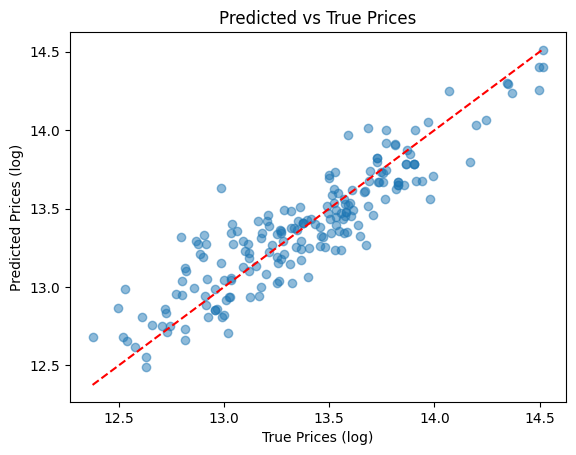

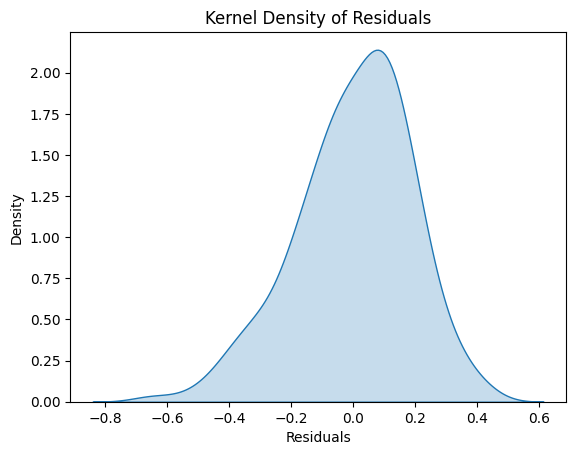

Residual Mean: 0.0013924192824015472
Residual Std: 0.18694665737033472


In [17]:
y_pred = linreg_full.predict(X_test)

# Scatter: Predicted vs True
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Prices (log)")
plt.ylabel("Predicted Prices (log)")
plt.title("Predicted vs True Prices")
plt.show()

# Residuals
residuals = y_test - y_pred

sns.kdeplot(residuals, fill=True)
plt.title("Kernel Density of Residuals")
plt.xlabel("Residuals")
plt.show()

print("Residual Mean:", residuals.mean())
print("Residual Std:", residuals.std())

6. The scatterplot of predicted vs. true prices shows that there is a general alignment along the diagonal, but the points are fairly dispersed. So, it struggles to make highly precise predictions. The kernel density plot of residuals is roughly centered around zero, showing that it is in general unbiased. However it is not perfectly bell-shaped as in leans right of zero. THe strengths of the model are that it combines numeric and categorical predictors, giving it relatively good predictive power. There is no strong systematic bias in the predictions. Weaknesses are that there is limited flexibility as a simple linear model cannot capture nonlinear relationships. Also, prediction errors are larger for higher-priced cars, so variance of residuals increases with price.

**Q3.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?